# HOMEWORK 2 - TRANSFER FUNCTIONS AND SYSTEM IDENTIFICATION

This homework is about transfer functions and system identification.
There are two problems.

Make a copy of this notebook, and answer the questions.

# Preliminaries

In [1]:
import control
import numpy as np
import matplotlib.pyplot as plt
import sympy
import tellurium as te
import sympy

# Helpers

In [2]:
class PlotResult(object):

    def __init__(self, times=None, yt=None, ax=None):
        self.times = times
        self.yt = yt
        self.ax = ax
        
    def __repr__(self):
        return ""

In [3]:
def plotTF(tf, times=None, is_plot=True, figsize=(5,5)):
    if times is None:
        times = np.linspace(0, 10, 100)
    _, yt = control.forced_response(tf, T=times, U=1)
    if is_plot:
        _, ax = plt.subplots(1, figsize=figsize)
        ax.plot(times, yt)
        ax.set_xlabel("time")
    else:
        ax = None
    return PlotResult(times=times, yt=yt, ax=ax)

# Tests
tf = control.TransferFunction([1], [1, 0])
plot_result = plotTF(tf, is_plot=False)
assert(isinstance(plot_result, PlotResult))
print("OK!")

OK!


# Problem 1: Constructing Laplace Transforms for reaction networks

In this problem, you will construct a Laplace transform
for the same branching network we discussed in class, but with
a different input and output.
Below is the reaction network:

\begin{eqnarray}
s_1 & \xrightarrow{k_1 s_1} s_2 \\
s_2 & \xrightarrow{k_2 s_2} s_1 \\
s_1 & \xrightarrow{k_3 s_1} s_3 \\
u & \xrightarrow{k_1 u} s_2 \\
\end{eqnarray}

The input to the system is $u$; the output is $s_3$. (In class, the output
was $s_2$.)

## 1. (5 pts) System equations

\begin{eqnarray}
\dot{s}_1 & = & k_2 s_2 - k_1 s_1 - k_3 s_1 \\
\dot{s}_2 & = & -k_2 s_2 + k_1 s_1 + k_1 u \\
\dot{s}_3 & = & k_3 s_1 \\
\end{eqnarray}

## 2. (5 pts) LT of system equations

\begin{eqnarray}
s S_1(s) & = & k_2 S_2(s) - k_1 S_1 (s) - k_3 S_1 (s) \\
s S_2 (s) & = & -k_2 S_2 (s) + k_1 S_1 (s) + k_1 U(s) \\
s S_3(s) & = & k_3 S_1 (s) \\
\end{eqnarray}

## 3. (25 pts) Calculate transfer function

We want $G(s) = \frac{S_2 (s)}{U(s)}$.

We can transform the first system equation so that we have $S_1 (s)$
in terms of $S_2 (s)$. That is,

\begin{eqnarray}
s S_1(s) & = & k_2 S_2(s) - k_1 S_1 (s) - k_3 S_1 (s) \\
S_1(s) (s + k_1 + k_3 ) & = & k_2 S_2(s) \\
S_1(s) & = & \frac{k_2 S_2(s)}{s + k_1 + k_3} \\
\end{eqnarray}

This allows us to substitute into the second system equation to obtain
the desired result.

\begin{eqnarray}
s S_2 (s) & = & -k_2 S_2 (s) + k_1 S_1 (s) + k_1 U(s) \\
s S_2 (s) & = & -k_2 S_2 (s) + k_1 \frac{k_2 S_2(s)}{s + k_1 + k_3} + k_1 U(s) \\
s S_2 (s) + k_2 S_2 (s) - k_1 \frac{k_2 S_2(s)}{s + k_1 + k_3} & = & k_1 U(s) \\
S_2 (s) & = & 
\frac{k_1 U(s)}{s  + k_2  - k_1 \frac{k_2}{s + k_1 + k_3}}
\\
\frac{S_2 (s)}{U(s)} & = & \frac{k_1(s + k_1 + k_3)}
{s(s  + k_1 + k_3) + k_2(s  + k_2  +k_3)  - k_1 k_2}\\
\frac{S_2 (s)}{U(s)} & = & \frac{k_1 s + k_1 (k_1 + k_3)}
{s^2 + s(k_1 + k_2 + k_3) + k_2 (k_2 +  k_3  - k_1)}\\
\end{eqnarray}

## 4. (5 pts) Predict step response

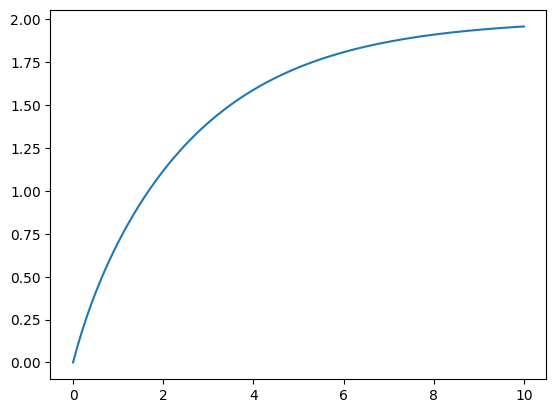

In [4]:
# Initialize constants
k1, k2, k3 = (1, 1, 1)
times = np.linspace(0, 10, 100)
# Response to input
tf = control.TransferFunction([k1, k1*(k1 + k3)],
                              [1, k1 + k2 + k3, k2*(k2 + k3 - k1)])
_, yt = control.forced_response(tf, T=times, U=1)
# Plot the results
plt.plot(times, yt)

## 5. (5 pts) Simulate in Antimony

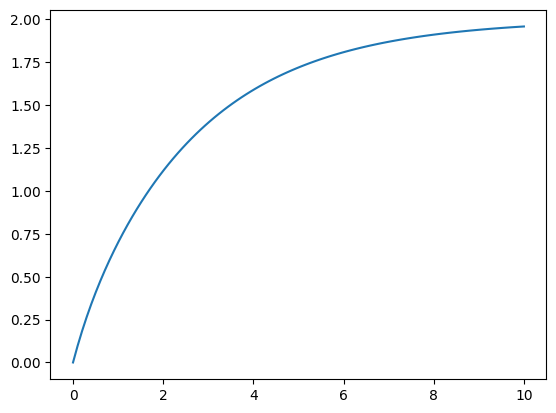

In [5]:
model = """
s1 -> s2; k1*s1
s2 -> s1; k2*s2
s1 -> s3; k3*s1
$u -> s2; k1*u

k1 = 1
k2 = 1
k3 = 1
s1 = 0
s2 = 0
s3 = 0
$u = 1
"""
rr = te.loada(model)
data = rr.simulate(0, 10, 100)
plt.plot(data["time"], data["[s2]"])

## 6. (5 pts) Analysis

$\frac{S_2 (s)}{U(s)} = \frac{k_1 s + k_1 (k_1 + k_3)}
{s^2 + s(k_1 + k_2 + k_3) + k_2 (k_2 +  k_3  - k_1)}$

Some observations
1. The DC gain for this transfer function is finite because
mass does not accumulate in $s_2$.
1. DC gain is $\frac{ k_1 (k_1 + k_3)}{k_2 (k_2 +  k_3  - k_1)}$.
That is, for $k_1, k_2, k_3 = (1, 1, 1)$, for every unit of $u$
we put in, we get 2 units of $s_2$ out.
1. DC gain increases with $k_1$, which makes sense since $s_2$ is favored.
1. Increasing $k_2$ reduces DC gain.
1. The effect of increasing $k_3$ depends on $k_1 / k_2$.

1. How does this transfer function differ from the 
transfer function $\frac{S_3 (s)}{U(s)}$ (e.g., DC gain) that
we did in class?
1. Why?

# Problem 2: System Identification

You will do system identification for the system you chose in the first homework.

## 1. (20 pts) Determine the operating region for you system.

Use ``SISOTransferFunctionBuilder`` to plot a staircase of the control input to your system and the measured output.
Explain why you chose the operating region you did (i.e., the value ranges of
the control input).

## 2. (20 pts) Find a tranfser function for your system for the operating region.

Use ``SISOTransferFunctionBuilder`` to fit a transfer function for your system.
Justify that the transfer function fits sufficiently well and does not overfit.

## 3. (10 pts)  Analyze the transfer function.

What is the DC gain? What are the poles? What are the implications for control?